# Credit Card Fraud Detection - Data Analysis

## Import Dependencies

In [145]:
%matplotlib inline
import pandas as pd
import matplotlib as plt


## Upload Data from CSV files and create Dataframes
There are 3 Data files that will be accessed via this notebook:
*	User Information: 219KB; 18 columns and 2,000 rows of data (users_df)
*	Credit Card Information: 475 KB; 13 columns and 6,146 rows of data (cards_df)
*	Credit Card Transactions – 2.18GB; 15 columns and 24,386,900 rows of data (transactions_df)


In [146]:
#User information dataset
users_df = pd.read_csv("Resources/sd254_users.csv")
users_df.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [147]:
#Shape of the User information
users_df.shape

(2000, 18)

In [148]:
#Credit Card information dataset
cards_df = pd.read_csv("Resources/sd254_cards.csv")
cards_df.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [149]:
#Shape of the Credit Card dataset
cards_df.shape

(6146, 13)

In [6]:
#===DO NOT EXECUTE=======
# Transaction dataset
#transactions_df = pd.read_csv("WMB Playground/credit_card_transactions-ibm_v2.csv/credit_card_transactions-ibm_v2.csv")


In [14]:
#===DO NOT EXECUTE OR CLEAR OUTPUT=======

#View of Transaction Dataframe
#transactions_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [7]:
#===DO NOT EXECUTE OR CLEAR OUTPUT=======

#Shape of the Transaction Dataset
#transactions_df.shape

(24386900, 15)

## Fraud Detection
Which Transactions were marked as Fraudulent?

#Wrote Fraud_df to CSV file for future use - Since transaction_df CSV file is clumbersome to execute

fraud_df.to_csv("Resources/fraudTransactions.csv", index=False, header=True)


In [150]:
#On Next rerun, use the file saved: fraudTransaction.csv

fraud_df = pd.read_csv("Resources/fraudTransactions.csv")


In [151]:
#===DO NOT EXECUTE (TO BE UPDATED)=======

#Transactions marked as Fraudulent
#fraud_df = transactions_df.loc[transactions_df["Is Fraud?"]=="Yes",:] 

fraud_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,Yes
1,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,Yes
2,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,NaN,NaN,4411,NaN,Yes
3,0,0,2015,11,16,09:46,$248.36,Online Transaction,4872340518840476610,ONLINE,NaN,NaN,5732,NaN,Yes
4,0,0,2015,11,16,11:20,$473.00,Online Transaction,-8566951830324093739,ONLINE,NaN,NaN,3640,NaN,Yes


In [152]:
fraud_df.shape

(29757, 15)

### Fraudulent Transaction: Form of accessing the Credit Card information
How was the transaction conducted - Chip, Online, or Swipe Transaction?

In [153]:
#Group of Fraudulent Transaction by "Use Chip"
fraud_chip_group= fraud_df.groupby(["Use Chip"])
fraud_chip_group["Is Fraud?"].count()

Use Chip
Chip Transaction       4836
Online Transaction    18349
Swipe Transaction      6572
Name: Is Fraud?, dtype: int64

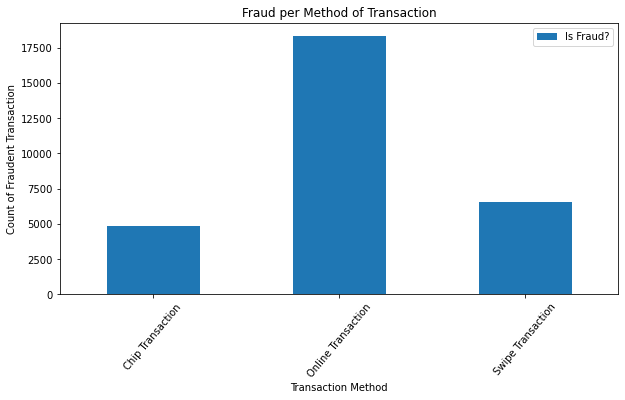

In [154]:
#Bar Chart showing which method of accessing Credit Card has a Higher count of Fraud
y_axis = fraud_group["Is Fraud?"].count()


fraud_bar_chart = y_axis.plot(kind="bar", 
                               title = "Fraud per Method of Transaction", 
                               rot =50, 
                               figsize=(10,5))
fraud_bar_chart.set_ylabel("Count of Fraudent Transaction")
fraud_bar_chart.set_xlabel("Transaction Method")

fraud_bar_chart.legend(loc="best")

### Fraudulent Transaction: Popular Merchant Category
Which business category was most likely to be the target of fraudulent transactions?

In [155]:
#Group of Fraudulent Transaction by "MCC"
fraud_MCC_group= fraud_df.groupby("MCC")
MCC_count = fraud_MCC_group.count().reset_index(drop=False)

#Created DataFrame for the MCC_count
MCC_count_df= pd.DataFrame(MCC_count[["MCC", "Is Fraud?"]])

#Sorted the Fraud by Merchant Category Code
MCC_count_df= MCC_count_df.sort_values("Is Fraud?", ascending=False)
MCC_count_df

,MCC,Is Fraud?
49,5311,4824
47,5300,2201
48,5310,2152
40,4829,1607
68,5912,1057
...,...,...
85,7802,15
78,7230,14
80,7531,11
92,8041,5


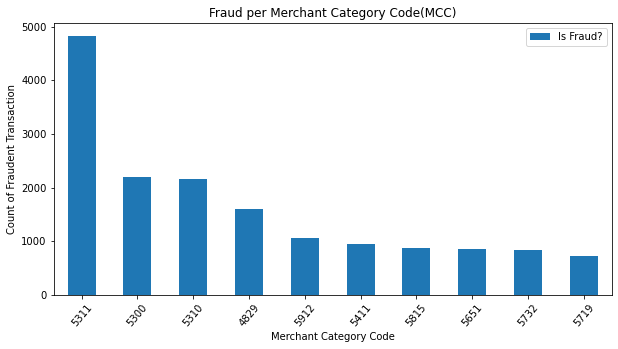

In [156]:
#Top Ten Merchant Category for Fraudulent Transaction
y_axis = MCC_count_df.head(10)


fraud_barMCC_chart = y_axis.plot(kind="bar",
                                 x="MCC",
                               title = "Fraud per Merchant Category Code(MCC)", 
                               rot =50, 
                               figsize=(10,5))
fraud_barMCC_chart.set_ylabel("Count of Fraudent Transaction")
fraud_barMCC_chart.set_xlabel("Merchant Category Code")

fraud_barMCC_chart.legend(loc="best")

Based on manual search, the MCC for the top 10 Fraudulent Transactions are as follows (for Visa and MasterCards):
* 5311 - Department Stores
* 5300 - Wholesale Clubs
* 5310 - Discount Stores
* 4829 - Wire Transfer Money Orders, Money Transfer
* 5912 - Drug Stores and Pharmacies
* 5411 - Grocery Stores, Supermarkets
* 5815 - Digital Goods: Books, Movies, Music
* 5651 - Family Clothing Stores
* 5732 - Electronics Sales
* 5719 - Miscellaneous House Furnishing Specialty Shops

### Fraudulent Transaction: By User Age
Does the likelihood of fraud occurring matters by age?

In [157]:
# Resetting the index of the User table so that it can be used in the assessment of fraud by age

new_user_df = users_df.reset_index()
new_user_df = new_user_df.rename(columns={"index":"User"})
new_user_df.head(5)

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [158]:
#Count of unique age
new_user_df["Current Age"].nunique()

80

In [159]:
#Youngest Current Age in the Dataset
new_user_df["Current Age"].min()

18

In [160]:
#Max Current Age in the Dataset
new_user_df["Current Age"].max()

101

In [161]:
# Merge two dataframes using a left join
fraud_user = pd.merge(fraud_df, new_user_df, on="User",how="left" )
fraud_user.head(2)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5


In [162]:
fraud_user.shape

(29757, 33)

In [163]:
fraud_user.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'Person', 'Current Age', 'Retirement Age',
       'Birth Year', 'Birth Month', 'Gender', 'Address', 'Apartment', 'City',
       'State', 'Zipcode', 'Latitude', 'Longitude',
       'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt',
       'FICO Score', 'Num Credit Cards'],
      dtype='object')

In [164]:
#Since the count of unique age is large - the age will be binned
bins = [0,29,39,49,59,69,79,89,110]

# Create the names for the bins
group_names = ["20's", "30's", "40's", "50's", "60's","70's","80's","90+"]

# Slice the data and place it into bins
fraud_user["Fraud Age Group"] = pd.cut(fraud_user["Current Age"], bins, labels=group_names, include_lowest=True)

# Creating a group based off of the bins
fraud_age_group_df = fraud_user.groupby("Fraud Age Group")


In [165]:
fraud_age_group_df["Is Fraud?"].count()

Fraud Age Group
20's     309
30's    3804
40's    6997
50's    7157
60's    5689
70's    2701
80's    2523
90+      577
Name: Is Fraud?, dtype: int64

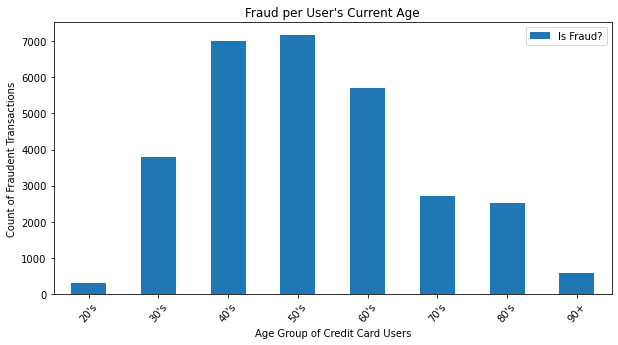

In [166]:
y_axis = fraud_age_group_df["Is Fraud?"].count()


fraud_barAge_chart = y_axis.plot(kind="bar",
                                 x="MCC",
                               title = "Fraud per User's Current Age", 
                               rot =50, 
                               figsize=(10,5))
fraud_barAge_chart.set_ylabel("Count of Fraudent Transactions")
fraud_barAge_chart.set_xlabel("Age Group of Credit Card Users")

fraud_barAge_chart.legend(loc="best")

### Fraudulent Transaction: By User Age and Income

In [ ]:
#Need to convert these object fields to number to do other assessment

In [167]:
fraud_user["Yearly Income - Person"].dtype

dtype('O')

In [169]:
fraud_age_group_df["Yearly Income - Person"].sum()

Fraud Age Group
20's    $43397$43397$43397$43397$43397$43397$43397$433...
30's    $51500$51500$51500$51500$51500$51500$51500$515...
40's    $109687$109687$41997$41997$41997$41997$41997$4...
50's    $59696$59696$59696$59696$59696$59696$59696$596...
60's    $249925$249925$249925$249925$249925$249925$249...
70's    $27484$27484$27484$27484$27484$27484$27484$274...
80's    $33483$33483$33483$33483$33483$33483$33483$334...
90+     $84694$84694$84694$84694$84694$84694$84694$846...
Name: Yearly Income - Person, dtype: object

### Fraudulent Transaction: By User Age and Debt

In [ ]:
#Need to convert these object fields to number to do other assessment

In [168]:
fraud_user["Total Debt"].dtype

dtype('O')

### Fraudulent Transaction: By User Age and Credit Limit

In [ ]:
# Need to merge fraud_user with cards_df to check on Credit Limit

In [ ]:
#Need to convert these object fields to number to do other assessment

### Fraudulent Transaction: Number of Credit Cards Owned
Will the likelihood of having a fraudulent transaction increase with the number of credit cards owned?

In [99]:
fraud_user["Num Credit Cards"].max()

9

In [100]:
fraud_user["Num Credit Cards"].min()

1

In [170]:
fraud_user["Num Credit Cards"].value_counts()

4    7714
3    6158
5    5515
6    3440
2    2915
7    1706
1    1433
8     775
9     101
Name: Num Credit Cards, dtype: int64

In [101]:
new_user_df.loc[new_user_df["Num Credit Cards"]==9,:]

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
116,116,Maci Diaz,26,66,1993,5,Female,9530 Washington Street,NaN,Novato,CA,94947,38.10,-122.63,$30335,$61850,$81158,728,9
729,729,Hallie Perry,61,69,1958,9,Female,7945 Fourth Avenue,NaN,Honolulu,HI,96825,21.30,-157.85,$30410,$62005,$149968,651,9
1327,1327,Santos Wright,92,67,1927,10,Male,31 Hillside Lane,NaN,Tucson,AZ,85711,32.21,-110.88,$17460,$24960,$889,707,9


In [ ]:
fraud_card_amt= fraud_user.groupby(["Num Credit Cards"])
fraud_card_amt.count()

### Fraudulent Transaction: Card Type (Debit vs Credit)

Compare Fraud with Card info: Debit/Credit; Card Brand Face Off

### Fraudulent Transaction: FICO Score

### Fraudulent Transaction: Amount Charged

### Fraudulent Transaction: Demography


### Fraudulent Transaction: Timeline (years, time of day etc)


# === PREVIOUS CHECKS========

In [129]:
user_1999=fraud_df.loc[fraud_df["User"]==1999,:]
user_1999

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?


In [130]:
user_1997=fraud_df.loc[fraud_df["User"]==1997,:]
user_1997

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
24363743,1997,1,2006,6,6,18:02,$56.81,Swipe Transaction,-4282466774399734331,North Bergen,NJ,7047.0,4829,NaN,Yes
24363750,1997,1,2006,6,8,09:31,$82.24,Swipe Transaction,-4282466774399734331,Staten Island,NY,10304.0,4829,NaN,Yes
24363752,1997,1,2006,6,8,11:46,$291.75,Swipe Transaction,2884193360641017720,Bronx,NY,10452.0,5311,NaN,Yes
24363753,1997,1,2006,6,8,13:33,$38.53,Swipe Transaction,1913477460590765860,Union City,NJ,7087.0,5300,NaN,Yes
24363755,1997,1,2006,6,8,19:00,$8.14,Swipe Transaction,-5624843686576836279,Linden,NJ,7036.0,7832,NaN,Yes
24363764,1997,1,2006,6,13,11:14,$13.91,Swipe Transaction,4573875080712571902,Staten Island,NY,10301.0,5045,NaN,Yes
24372744,1997,1,2018,6,21,11:27,$4.70,Chip Transaction,7069584154815291371,Rome,Italy,NaN,5812,NaN,Yes
24372748,1997,1,2018,6,25,13:27,$659.56,Chip Transaction,-3943656582743129537,Rome,Italy,NaN,5712,NaN,Yes
24372749,1997,1,2018,6,25,18:22,$132.48,Chip Transaction,483490033258680568,Rome,Italy,NaN,3504,NaN,Yes
24372750,1997,1,2018,6,27,11:41,$-82.00,Chip Transaction,-5162038175624867091,Rome,Italy,NaN,5541,NaN,Yes


In [131]:
user_1997["Is Fraud?"].value_counts()

Yes    20
Name: Is Fraud?, dtype: int64

In [132]:
#Information on User 1997 - This user have 3 cards
users_df.iloc[1997,:]

Person                              Annika Russell
Current Age                                     47
Retirement Age                                  67
Birth Year                                    1973
Birth Month                                      1
Gender                                      Female
Address                        276 Fifth Boulevard
Apartment                                      NaN
City                                     Elizabeth
State                                           NJ
Zipcode                                       7201
Latitude                                     40.66
Longitude                                   -74.19
Per Capita Income - Zipcode                 $15175
Yearly Income - Person                      $30942
Total Debt                                  $71066
FICO Score                                     779
Num Credit Cards                                 3
Name: 1997, dtype: object

In [143]:
#Card information for user 1997 - 

cards_df.loc[cards_df["User"]==1997,:]

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
6140,1997,0,Mastercard,Debit,5916545236079509,07/2024,314,YES,1,$16415,07/2016,2016,No
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No


In [144]:

#Card information for CARD INDEX = 0; it is not unique to a specific brand of card

cards_df.loc[cards_df["CARD INDEX"]==0,:]

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
5,1,0,Visa,Credit,4404898874682993,09/2003,736,YES,1,$27500,09/2003,2012,No
10,2,0,Mastercard,Debit,5495199163052054,03/2022,677,YES,2,$31599,10/2009,2009,No
15,3,0,Visa,Credit,4017261190134817,05/2015,877,YES,2,$98100,01/2011,2011,No
19,4,0,Mastercard,Debit,5905027855347659,01/2022,886,YES,1,$34900,12/1999,2012,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,1995,0,Visa,Debit,4351221158003580,08/2012,302,YES,2,$27317,01/2010,2010,No
6136,1996,0,Mastercard,Debit,5345225563130049,06/2018,321,NO,2,$19756,10/2014,2014,No
6140,1997,0,Mastercard,Debit,5916545236079509,07/2024,314,YES,1,$16415,07/2016,2016,No
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No


In [135]:
#User 1997 have 20 fraud reports - impacting the Amex and Visa cards, not master

# are there any fraud on Mastercard??
user_1997.loc[user_1997["Is Fraud?"]=="Yes",:]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
24363743,1997,1,2006,6,6,18:02,$56.81,Swipe Transaction,-4282466774399734331,North Bergen,NJ,7047.0,4829,NaN,Yes
24363750,1997,1,2006,6,8,09:31,$82.24,Swipe Transaction,-4282466774399734331,Staten Island,NY,10304.0,4829,NaN,Yes
24363752,1997,1,2006,6,8,11:46,$291.75,Swipe Transaction,2884193360641017720,Bronx,NY,10452.0,5311,NaN,Yes
24363753,1997,1,2006,6,8,13:33,$38.53,Swipe Transaction,1913477460590765860,Union City,NJ,7087.0,5300,NaN,Yes
24363755,1997,1,2006,6,8,19:00,$8.14,Swipe Transaction,-5624843686576836279,Linden,NJ,7036.0,7832,NaN,Yes
24363764,1997,1,2006,6,13,11:14,$13.91,Swipe Transaction,4573875080712571902,Staten Island,NY,10301.0,5045,NaN,Yes
24372744,1997,1,2018,6,21,11:27,$4.70,Chip Transaction,7069584154815291371,Rome,Italy,NaN,5812,NaN,Yes
24372748,1997,1,2018,6,25,13:27,$659.56,Chip Transaction,-3943656582743129537,Rome,Italy,NaN,5712,NaN,Yes
24372749,1997,1,2018,6,25,18:22,$132.48,Chip Transaction,483490033258680568,Rome,Italy,NaN,3504,NaN,Yes
24372750,1997,1,2018,6,27,11:41,$-82.00,Chip Transaction,-5162038175624867091,Rome,Italy,NaN,5541,NaN,Yes


In [ ]:
fraud_df["User"].unique()

In [ ]:
fraud_df.loc[fraud_df["Card"]==0,:].count()

In [ ]:
user_1999.loc[user_1999["Is Fraud?"]=="Yes",:]

In [136]:
#Original Grouped

group_transaction =fraud_df.groupby(["Errors?"])
group_transaction.count()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
Errors?,,,,,,,,,,,,,,
Bad CVV,280,280,280,280,280,280,280,280,280,280,0,0,280,280
"Bad CVV,Insufficient Balance",4,4,4,4,4,4,4,4,4,4,0,0,4,4
"Bad CVV,Technical Glitch",1,1,1,1,1,1,1,1,1,1,0,0,1,1
Bad Card Number,105,105,105,105,105,105,105,105,105,105,0,0,105,105
"Bad Card Number,Insufficient Balance",2,2,2,2,2,2,2,2,2,2,0,0,2,2
Bad Expiration,120,120,120,120,120,120,120,120,120,120,0,0,120,120
"Bad Expiration,Bad CVV",2,2,2,2,2,2,2,2,2,2,0,0,2,2
"Bad Expiration,Insufficient Balance",1,1,1,1,1,1,1,1,1,1,0,0,1,1
"Bad Expiration,Technical Glitch",2,2,2,2,2,2,2,2,2,2,0,0,2,2


In [ ]:
nan,

"'Technical Glitch'":"Technical Glitch" 
"'Insufficient Balance'":"Insufficient Balance", 
"'Bad PIN'":"Bad PIN",
"'Bad PIN":"Bad PIN",
"Insufficient Balance'":"Insufficient Balance",
"'Bad Expiration'":"Bad Expiration",
"'Bad PIN":"Bad PIN",
"Technical Glitch'":"Technical Glitch",
"'Bad Card Number'":"Bad Card Number",
"'Bad CVV'":"Bad CVV",
"'Bad Zipcode'":"Bad Zipcode",
"'Insufficient Balance":"Insufficient Balance",
"Technical Glitch'":"Technical Glitch",
"'Bad Card Number":"Bad Card Number",
"Insufficient Balance'":"Insufficient Balance",
"'Bad Card Number":"Bad Card Number",
"Bad CVV'":"Bad CVV",
"'Bad CVV":"Bad CVV",
"Insufficient Balance'":"Insufficient Balance",
"'Bad Card Number":"Bad Card Number",
"Bad Expiration'":"Bad Expiration",
"'Bad Expiration":"Bad Expiration",
"Bad CVV'":"Bad CVV", 
"'Bad Expiration":"Bad Expiration",
"Insufficient Balance'":"Insufficient Balance",
"'Bad Expiration":"Bad Expiration",
"Technical Glitch'":"Technical Glitch",
"'Bad Card Number":"Bad Card Number",
"Bad Expiration":"Bad Expiration",
"Technical Glitch'":"Technical Glitch",
"'Bad CVV":"Bad CVV",
"Technical Glitch'":"Technical Glitch", 
"'Bad Card Number":"Bad Card Number",
"Technical Glitch'":"Technical Glitch",
"'Bad Zipcode":"Bad Zipcode",
"Insufficient Balance'":"Insufficient Balance",
"'Bad Zipcode":"Bad Zipcode",
"Technical Glitch'":"Technical Glitch",
"'Bad Card Number":"Bad Card Number",
"Bad Expiration":"Bad Expiration",
"Insufficient Balance'":"Insufficient Balance",

In [ ]:
# Clean up Employer category ie Rename mistyped columns
#Replace 'SELF' and 'SELF EMPLOYED' with 'SELF-EMPLOYED'

#This did not work as the column values are a combination of errors

#Updating the column values
Unique_Error_df['Errors?'] = Unique_Error_df['Errors?'].replace({
    "'Technical Glitch'":"Glitch", 
    "'Insufficient Balance'":"Insufficient Balance", 
    "'Bad PIN'":"PIN",
    "'Bad PIN":"PIN",
    "Insufficient Balance'":"Insufficient Balance",
    "'Bad Expiration'":"Bad Expiration",
    "'Bad PIN":"PIN",
    "Technical Glitch'":"Glitch",
    "'Bad Card Number'":"Bad Card Number",
    "'Bad CVV'":"Bad CVV",
    "'Bad Zipcode'":"Zipcode",
    "'Insufficient Balance":"Insufficient Balance",
    "Technical Glitch'":"Glitch",
    "'Bad Card Number":"Bad Card Number",
    "Insufficient Balance'":"Insufficient Balance",
    "'Bad Card Number":"Bad Card Number",
    "Bad CVV'":"Bad CVV",
    "'Bad CVV":"Bad CVV",
    "Insufficient Balance'":"Insufficient Balance",
    "'Bad Card Number":"Bad Card Number",
    "Bad Expiration'":"Bad Expiration",
    "'Bad Expiration":"Bad Expiration",
    "Bad CVV'":"Bad CVV",
    "'Bad Expiration":"Bad Expiration",
    "Insufficient Balance'":"Insufficient Balance",
    "'Bad Expiration":"Bad Expiration",
    "Technical Glitch'":"Glitch",
    "'Bad Card Number":"Bad Card Number",
    "Bad Expiration":"Bad Expiration",
    "Technical Glitch'":"Glitch",
    "'Bad CVV":"Bad CVV",
    "Technical Glitch'":"Glitch", 
    "'Bad Card Number":"Bad Card Number",
    "Technical Glitch'":"Glitch",
    "'Bad Zipcode":"Zipcode",
    "Insufficient Balance'":"Insufficient Balance",
    "'Bad Zipcode":"Zipcode",
    "Technical Glitch'":"Glitch",
    "'Bad Card Number":"Bad Card Number",
    "Bad Expiration":"Bad Expiration",
    "Insufficient Balance'":"Insufficient Balance"
})




In [ ]:
Unique_Error_df["Errors?"].nunique()

In [ ]:
grouped_df = Unique_Error_df.groupby(["Errors?"])
print(grouped_df)

In [ ]:
grouped_df.count()

In [ ]:
Unique_Error_df["Errors?"].unique()

## User Information

In [ ]:
cards_df.loc[cards_df["User"]==1997,:]

In [ ]:
users_df["Person"].nunique()

In [ ]:
users_df.columns

In [ ]:
#Code to weed out the duplicates
#Create new DF with just the index and the Person

new_users = users_df["Person"]

dup_users = []
final_users= []


for i in new_users:
    if i not in final_users:
        final_users.append(i)
    else:
        dup_users.append(i)

In [ ]:
dup_users

In [ ]:
#checking the user dataframe against the duplicates to see if there is any abnomities - None identified
users_df.loc[users_df["Person"]=="Rory Nelson",:]


In [128]:
users_df.iloc[0,:]

Person                         Hazel Robinson
Current Age                                53
Retirement Age                             66
Birth Year                               1966
Birth Month                                11
Gender                                 Female
Address                         462 Rose Lane
Apartment                                 NaN
City                                 La Verne
State                                      CA
Zipcode                                 91750
Latitude                                34.15
Longitude                             -117.76
Per Capita Income - Zipcode            $29278
Yearly Income - Person                 $59696
Total Debt                            $127613
FICO Score                                787
Num Credit Cards                            5
Name: 0, dtype: object